In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
city_data_to_load="Resources/city_data.csv"
ride_data_to_load="Resources/ride_data.csv"

In [3]:
#Read City data and load in df
city_data_df=pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
#read ride data and load in df
ride_data_df=pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
#Get all the rows that contain null values, first get col and row that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
#Get all the rows that contain null values
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
#Make sure the driver_count column has an integer data type.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
#Get unique values of city type
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [10]:
#Find out how many data points there are for each type of city.
city_data_df.groupby("type").count()

,city,driver_count
type,,
Rural,18,18
Suburban,36,36
Urban,66,66


In [11]:
#inspect ride data df, get all null values
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [12]:
#get d types
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [13]:
#Merge Data Frames
pyber_data_df=pd.merge(ride_data_df,city_data_df,on="city",how="left")

#display df
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [14]:
urban_cities_df=pyber_data_df[pyber_data_df["type"]=="Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [15]:
suburban_cities_df=pyber_data_df[pyber_data_df["type"]=="Suburban"]

In [16]:
rural_cities_df=pyber_data_df[pyber_data_df["type"]=="Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [17]:
# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [18]:
# Create the suburban and rural ride count.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [19]:
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [20]:
# Get average fare for each city in the suburban and rural cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]


In [21]:
#Get avg drivers urban
urban_driver_count=urban_cities_df.groupby("city").mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [22]:
# Get the average number of drivers for each city for the suburban and rural cities.
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]


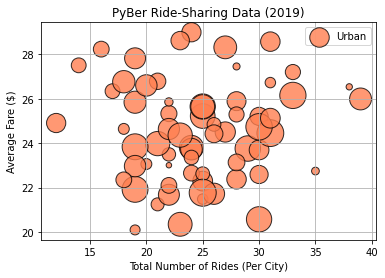

In [23]:
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s=10*urban_driver_count,
            c="coral",
            edgecolors="k", linewidths=1,
            alpha=.8, label="Urban"
           )
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.legend()
plt.grid(True)
plt.show()

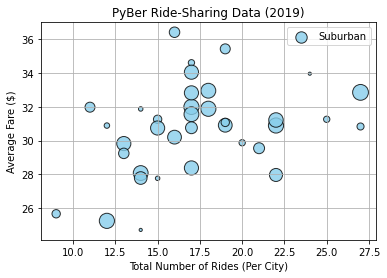

In [24]:
plt.scatter(suburban_ride_count,suburban_avg_fare,
           color="skyblue", edgecolors="k", 
            s=10*suburban_driver_count, alpha=.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.legend()
plt.grid(True)

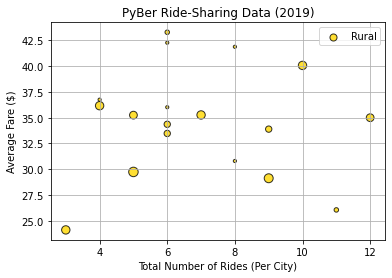

In [25]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

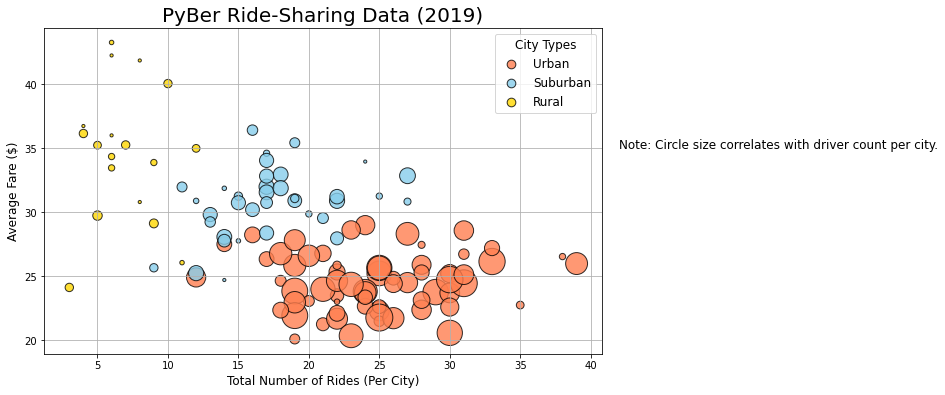

In [26]:
# Build the scatter charts for each city type.
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)


# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("analysis/RidesVAvgFare.png")

# Show the plot
plt.show()

In [30]:
# Get summary statistics.
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [31]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [32]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [33]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [34]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [35]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [36]:
round(urban_ride_count.mean(),2),round(suburban_ride_count.mean(),2),round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [37]:
round(urban_ride_count.median(),2),round(suburban_ride_count.median(),2),round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [38]:
round(urban_ride_count.mode(),2),round(suburban_ride_count.mode(),2),round(rural_ride_count.mode(),2)

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [39]:
#import numpy and scipy.stats
import numpy as np
import scipy.stats as sts

In [40]:
#Measures of Central Tendency
mean_urban_ride_count=np.mean(urban_ride_count)
median_urban_ride_count=np.median(urban_ride_count)
mode_urban_ride_count=sts.mode(urban_ride_count)
print(f"mean is {mean_urban_ride_count}")
print(f"median is {median_urban_ride_count}")
print(f"mode is {mode_urban_ride_count}")

mean is 24.62121212121212
median is 24.0
mode is ModeResult(mode=array([22]), count=array([7]))


In [41]:
#get stats for urban fares
urban_fares=urban_cities_df["fare"]
suburban_fares=suburban_cities_df["fare"]
rural_fares=rural_cities_df["fare"]

mean_urban_fares=np.mean(urban_cities_df["fare"])
median_urban_fares=np.median(urban_cities_df["fare"])
mode_urban_fares=sts.mode(urban_cities_df["fare"])
print(f"Mean is {mean_urban_fares:.2f}. Median is {median_urban_fares}. Mode is {mode_urban_fares}")

Mean is 24.53. Median is 24.64. Mode is ModeResult(mode=array([22.86]), count=array([5]))


In [42]:
#get stats for suburban ride count
mean_suburban_ride_count=np.mean(suburban_ride_count)
median_suburban_ride_count=np.median(suburban_ride_count)
mode_suburban_ride_count=sts.mode(suburban_ride_count)
print(f"mean is {mean_suburban_ride_count:.1f}. Median is {median_suburban_ride_count}. Mode is {mode_suburban_ride_count}")

mean is 17.4. Median is 17.0. Mode is ModeResult(mode=array([17]), count=array([7]))


In [43]:
#get stats for rural ride count
mean_rural_ride_count=np.mean(rural_ride_count)
median_rural_ride_count=np.median(rural_ride_count)
mode_rural_ride_count=sts.mode(rural_ride_count)
print(f"Mean={mean_rural_ride_count:.1f}, Median={median_rural_ride_count}, {mode_rural_ride_count}")

Mean=6.9, Median=6.0, ModeResult(mode=array([6]), count=array([5]))


In [44]:
#Get driver count for each type, calc stats
urban_drivers=urban_cities_df["driver_count"]
suburban_drivers=suburban_cities_df["driver_count"]
rural_drivers=rural_cities_df["driver_count"]

mean_urban_drivers=np.mean(urban_drivers)
median_urban_drivers=np.median(urban_drivers)
mode_urban_drivers=sts.mode(urban_drivers)

mean_suburban_drivers=np.mean(suburban_drivers)
median_suburban_drivers=np.median(suburban_drivers)
mode_suburban_drivers=sts.mode(suburban_drivers)

mean_rural_drivers=np.mean(rural_drivers)
median_rural_drivers=np.median(rural_drivers)
mode_rural_drivers=sts.mode(rural_drivers)

print(f"       Mean     Median  Mode\n"+
      f"Urban: {mean_urban_drivers:.1f}     {median_rural_drivers:.1f}     {mode_rural_drivers.mode[0]}\n"+
     f"Subrb: {mean_suburban_drivers:.1f}     {median_suburban_drivers:.1f}    {mode_rural_drivers.mode[0]}\n"+
     f"Rural: {mean_rural_drivers:.1f}      {median_rural_drivers:.1f}     {mode_rural_drivers.mode[0]}")

       Mean     Median  Mode
Urban: 36.7     4.0     1
Subrb: 13.7     16.0    1
Rural: 4.3      4.0     1


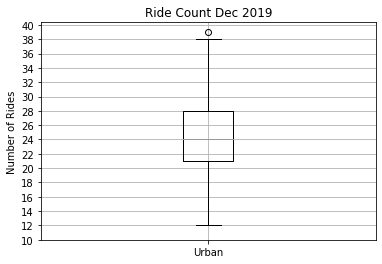

In [45]:
#Create a box and whisker plot
x_labels=["Urban"]
fig, ax=plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
ax.set_title("Ride Count Dec 2019")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10,41,step=2))
ax.grid()

plt.show()

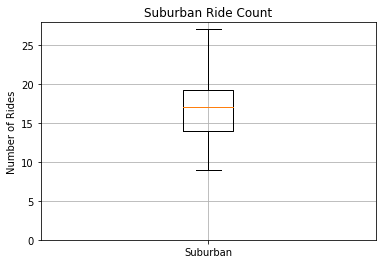

In [46]:
xlab=["Suburban"]
fig, ax=plt.subplots()
ax.boxplot(suburban_ride_count,labels=["Suburban"])
ax.set_title("Suburban Ride Count")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(0,30,5))
ax.grid()
plt.show()

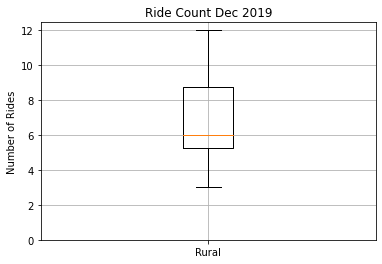

In [47]:
#Create a box and whisker plot
x_labels=["Rural"]
fig, ax=plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)
ax.set_title("Ride Count Dec 2019")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(0,13,step=2))
ax.grid()
plt.show()

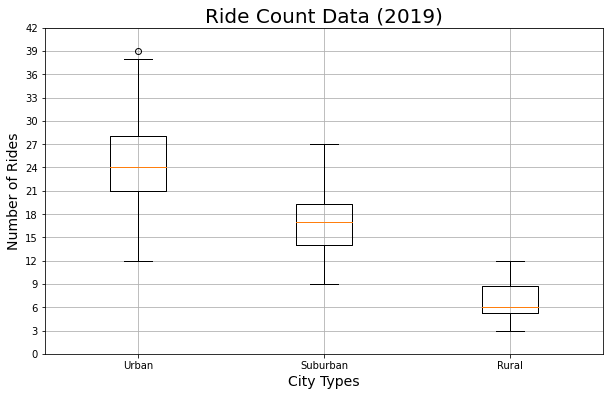

In [49]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Whiskers_RideCounts.png")
plt.show()

In [50]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


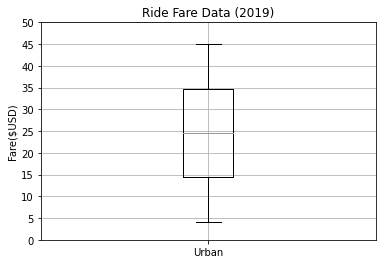

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [51]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

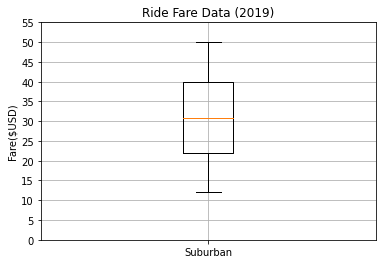

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [52]:
# Create a box-and-whisker plot for the suburban fare data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 60, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

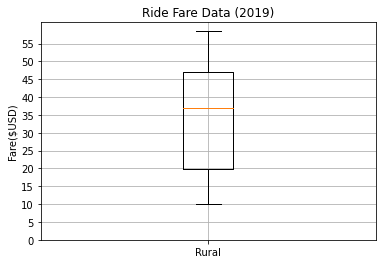

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [53]:
# Create a box-and-whisker plot for the rural fare data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 60, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

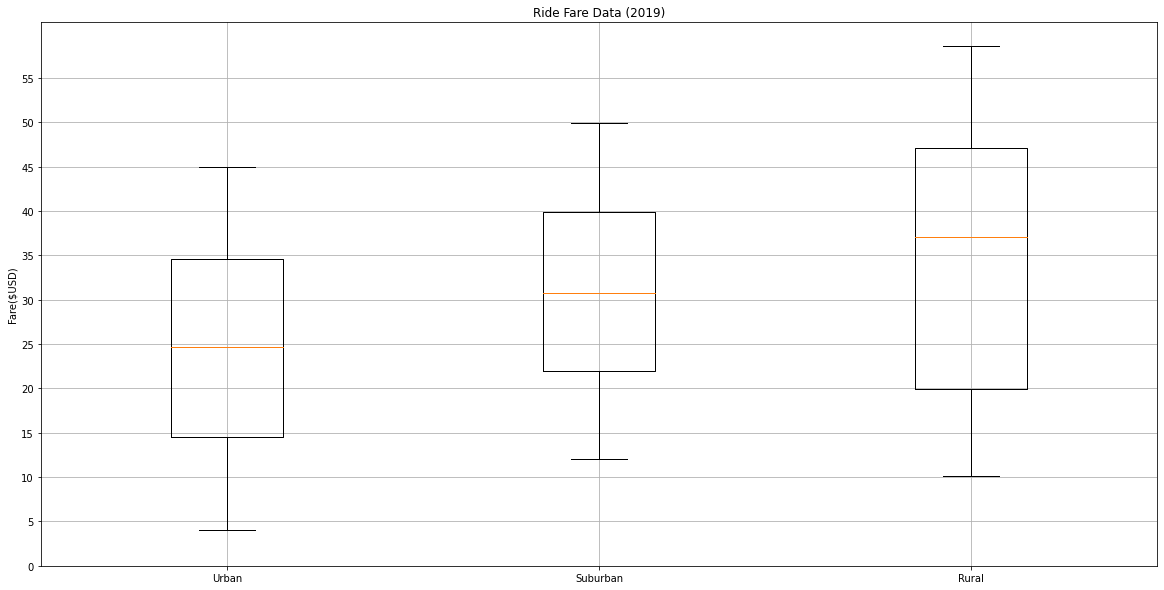

In [54]:
# Create a box-and-whisker plot for all three
x_labels = ["Urban","Suburban","Rural"]
all_three=[urban_fares,suburban_fares,rural_fares]
fig, ax = plt.subplots(figsize=(20,10))
ax.boxplot(all_three, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 60, step=5.0))
ax.grid()
plt.savefig("analysis/Whiskers_FareData.png")
plt.show()

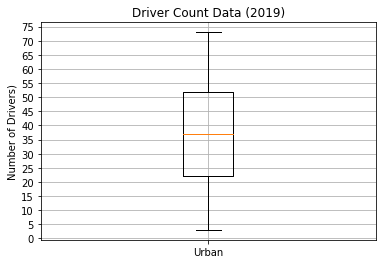

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [55]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 80, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

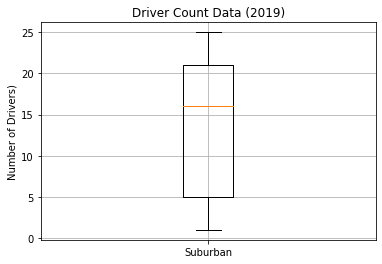

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [56]:
# Create the box-and-whisker plot for the suburban driver count data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 30, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_drivers.describe()

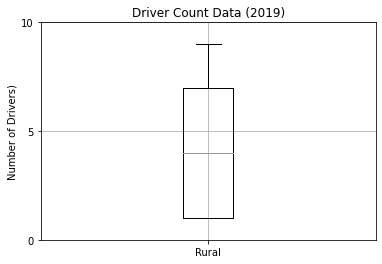

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [57]:
# Create the box-and-whisker plot for the suburban driver count data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 12, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_drivers.describe()

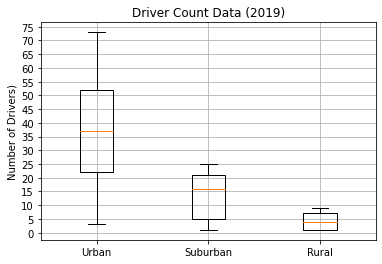

In [58]:
# Create the box-and-whisker plot for the suburban driver count data.
x_labels = ["Urban","Suburban","Rural"]
all_three_driver=[urban_drivers,suburban_drivers,rural_drivers]
fig, ax = plt.subplots()
ax.boxplot(all_three_driver,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 80, step=5.0))
ax.grid()
plt.savefig("analysis/Whiskers_DriverCounts.png")
plt.show()

In [59]:
#Calculate total fares
total_fares=ride_data_df["fare"].sum()

In [60]:
#Calculate fares by city
sum_fares_by_type=pyber_data_df.groupby(["type"]).sum(["fare"])
sum_fares_by_type

,fare,ride_id,driver_count
type,,,
Rural,4327.93,580968240341287,537
Suburban,19356.33,3106884522576766,8570
Urban,39854.38,7919412664056093,59602


In [61]:
urban_total_fares=pyber_data_df[(pyber_data_df["type"]=="Urban")].sum()["fare"]
suburban_total_fares=pyber_data_df[(pyber_data_df["type"]=="Suburban")].sum()["fare"]
rural_total_fares=pyber_data_df[(pyber_data_df["type"]=="Rural")].sum()["fare"]
suburban_total_fares

19356.33

In [62]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

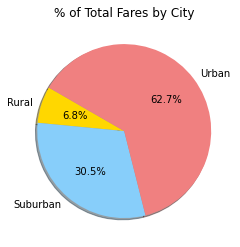

In [63]:
plt.pie(sum_fares_by_type["fare"],labels=["Rural","Suburban","Urban"],
       colors=["gold","lightskyblue","lightcoral"],
       explode=[0,0,0],autopct="%1.1f%%",
       shadow=True,startangle=150)
plt.title("% of Total Fares by City")
plt.show()

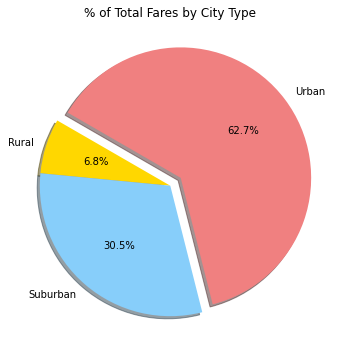

In [64]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig5.png")
# Show Figure
plt.show()

In [65]:
# Calculate the percentage of rides for each city type.
ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

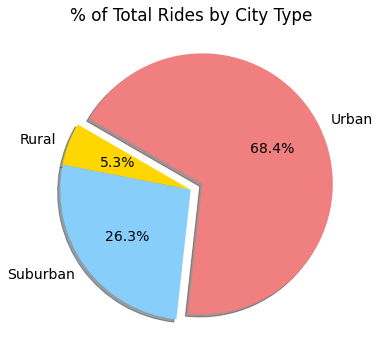

In [66]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig6.png")
# Show Figure
plt.show()

In [67]:
# Calculate the percentage of drivers for each city type.
driver_percents = 100 * city_data_df.groupby(["type"]).sum()["driver_count"] / city_data_df["driver_count"].sum()
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

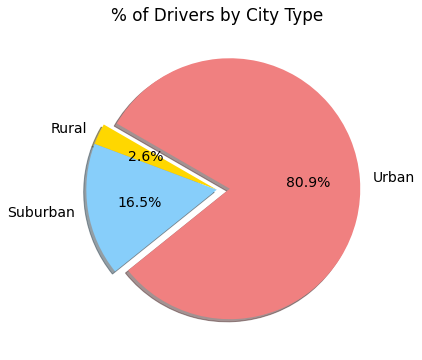

In [68]:
# Build percentage of drivers by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(driver_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Drivers by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Pie_DriversByCityType.png")
# Show Figure
plt.show()